# Analysis of the Cyclistic Dataset

## Summary
    The Goal of this analysis was to determine the habits of member and non-member riders and determine methods to convert more non-members to member status. During analysis it was determined that Cyclistic had captured most of it's regular commuter base but had not yet
captured casual riders cycling around a nearby lake.

The following is a proper analysis of the Cyclistic dataset. Cyclistic stakeholders want to know the habits of member versus non-member customers and how to convert more customers to members.  
This project was cleaned, analyzed and visualized by **Brandon Ejem**. [LinkedIn](https://www.linkedin.com/in/ejem-brandon/)

**Data Source:** [divvy-tripdata](https://divvy-tripdata.s3.amazonaws.com/index.html)

---

### Evaluation of this dataset includes
[ ] download 12 recent months of the csv files  
[ ] check the files for congruency
[ ] merge the files  
[ ] check again for redundancies or errors  
[ ] Handle missing values  
[ ] convert data types to usable values  
[ ] Feature engineering - creating calculations to find ride lengths, day_of_week, ect.  
[ ] Data filtering - remove any poor values like extremely short ride lengths or excessively long rides  
[ ] Sanity check - use .describe() to review the cleaned data  

---

### Analysis begins
[ ] Gather summary statistics  
[ ] Find the distributions of ride lengths (member-v-casual)  
[ ] Count and visualize rides per day (member-v-casual)  
[ ] Visualize rides by hour (member-v-casual)  
[ ] Visualize rides by month (member-v-casual)  
[ ] List popular stations (member-v-casual)  
[ ] Analyze bike type usage (member-v-casual)  

---

### Summarize findings
[ ] How are the habits of members or casuals different?  
[ ] What might help convert more casual riders to members?  
[ ] Visual summaries  

---

### Recommendation and Conclusion
[ ] What is the recommendation for the stakeholders  
[ ] Acknoledge potential limitations of the dataset and analysis  
[ ] Final Remarks  

### The story behind this project  
I want to share my journey creating this project as it was my first official data project. I'll share where I started, pitfalls I encountered, how I handled it, and how I reached the finished project.

In [4]:
#Ensuring the libraries are correctly installed
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Cyclistic Data Analysis
#Author: Brandon Ejem

#Import python libraries
import os
import pandas as pd
import numpy as np
import matplotlib as plt


#List directory and print the head of each file to verify congruency
Extract_DIR = r"F:\Cyclistic\Final\Extracted_CSV"

#list all csv files in the directory
csv_files = [f for f in os.listdir(Extract_DIR) if f.endswith('.csv')]

if not csv_files:
    print(f"No CSV files found")
else:
    print(f"Found {len(csv_files)} CSV files.")
    #sort the files
    csv_files.sort()

    #Read and display head(), info(), and describe() for each file
    for i, file_name in enumerate(csv_files):
        csv_file_path = os.path.join(Extract_DIR, file_name)
        print(f"\n Head of {file_name} [{i+1}/{len(csv_files)}]")
        try:
            #Read the CSV file into a Dataframe
            df = pd.read_csv(csv_file_path)
            print(df.head())
            print(df.info())
            print(df.describe())
        except pd.errors.EmptyDataError:
            print(f"  Error: {file_name} is empty or contains no data.")
        except pd.errors.ParserError as pe:
            print(f"  Error parsing {file_name}: {pe}. Check file format or delimiters.")
        except Exception as e:
            print(f"  An unexpected error occurred while reading {file_name}: {e}")

print("\nCSV inspection complete!")

Found 15 CSV files.

 Head of 202407-divvy-tripdata.csv [1/15]
            ride_id  rideable_type               started_at  \
0  2658E319B13141F9  electric_bike  2024-07-11 08:15:14.784   
1  B2176315168A47CE  electric_bike  2024-07-11 15:45:07.851   
2  C2A9D33DF7EBB422  electric_bike  2024-07-11 08:24:48.192   
3  8BFEA406DF01D8AD  electric_bike  2024-07-11 08:46:06.864   
4  ECD3EF02E5EB73B6  electric_bike  2024-07-11 18:18:16.588   

                  ended_at start_station_name start_station_id  \
0  2024-07-11 08:17:56.335                NaN              NaN   
1  2024-07-11 16:06:04.243                NaN              NaN   
2  2024-07-11 08:28:05.237                NaN              NaN   
3  2024-07-11 09:14:11.664                NaN              NaN   
4  2024-07-11 18:30:20.288                NaN              NaN   

  end_station_name end_station_id  start_lat  start_lng  end_lat  end_lng  \
0              NaN            NaN      41.80     -87.59    41.79   -87.59   
1      

### Evaluation of this dataset includes
[x] download 12 recent months of the csv files  
[x] check the files for congruency
[ ] merge the files  
[ ] check again for redundancies or errors  
[ ] Handle missing values  
[ ] convert data types to usable values  
[ ] Feature engineering - creating calculations to find ride lengths, day_of_week, ect.  
[ ] Data filtering - remove any poor values like extremely short ride lengths or excessively long rides  
[ ] Sanity check - use .describe() to review the cleaned data  

After retrieving the relevant files, I checked the data and ensured that the tables were all consistent. Now I want to merge the files into one larger file and begin checking for duplicates, errors, or missing values. I will also convert data types as needed.

In [6]:
#sum up the number of rows in each file
total_rows = sum(pd.read_csv(os.path.join(Extract_DIR, file_name)).shape[0] for file_name in csv_files)
print(f"\nTotal number of rows across all files: {total_rows}")

#Merge the files into one larger file

for i, file_name in enumerate(csv_files):
    csv_file_path = os.path.join(Extract_DIR, file_name)
    try:
        #Read the CSV file into a Dataframe
        df = pd.read_csv(csv_file_path)
        if i == 0:
            merged_df = df
        else:
            merged_df = pd.concat([merged_df, df], ignore_index=True)
    except Exception as e:
        print(f"Error reading {file_name}: {e}")
#Save the merged DataFrame to a new CSV file
merged_file_path = os.path.join(Extract_DIR, 'merged_cyclistic_data_2025.csv')
merged_df.to_csv(merged_file_path, index=False)
print(f"\nMerged data saved to {merged_file_path}")

#Check for duplicates, errors, or missing values
print("\nChecking for duplicates, errors, or missing values...")
duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
missing_values = merged_df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Convert data types as needed
# Convert 'started_at' and 'ended_at' to datetime
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'], errors='coerce')
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'], errors='coerce')
# Convert 'member_casual' to category
merged_df['member_casual'] = merged_df['member_casual'].astype('category')
# Display the data types of the columns
print("\nData types after conversion:")
print(merged_df.dtypes)
#print final number of rows
print(f"\nFinal number of rows in merged data: {merged_df.shape[0]}")


Total number of rows across all files: 22371225

Merged data saved to F:\Cyclistic\Final\Extracted_CSV\merged_cyclistic_data_2025.csv

Checking for duplicates, errors, or missing values...
Number of duplicate rows: 11177165
Missing values in each column:
ride_id                      0
rideable_type                0
started_at                   0
ended_at                     0
start_station_name     4354309
start_station_id       4354309
end_station_name       4470467
end_station_id         4470467
start_lat                    0
start_lng                    0
end_lat                  18113
end_lng                  18113
member_casual                0
ride_length           11194060
hour_of_day           11194060
day_of_week           11194060
season                11194060
dtype: int64

Data types after conversion:
ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name        

### Evaluation of this dataset includes
[x] download 12 recent months of the csv files  
[x] check the files for congruency
[x] merge the files  
[x] check again for redundancies or errors  
[ ] Handle missing values  
[x] convert data types to usable values  
[ ] Feature engineering - creating calculations to find ride lengths, day_of_week, ect.  
[ ] Data filtering - remove any poor values like extremely short ride lengths or excessively long rides  
[ ] Sanity check - use .describe() to review the cleaned data 

In the final merged dataset we had
- 5,597,030 rows of data
- 0 duplicates
- over 1 million missing Start & End Station names/ids

Bike share companies don't require you to begin or end your ride at a station, so the missing station locations isn't much of a concern. We can still use that information to determine the most popular station locations.
There are around 6000 missing end coordinates, this could be due to theft, damage, or vandalism to the bikes resulting in a loss of their final location.

Other than that our data seems like it could be free of missing values,
[x] Handle missing values  

Next I want usable information that could help me learn more about the difference between our casual and member riders.
Goals are,
- Add ride length
- Add hour of day, day of week, and seasons

In [7]:
#Adding Feature Engineering
# Add ride length in minutes
merged_df['ride_length'] = (merged_df['ended_at'] - merged_df['started_at']).dt.total_seconds() / 60
# Add hour of day
merged_df['hour_of_day'] = merged_df['started_at'].dt.hour
# Add day of week
merged_df['day_of_week'] = merged_df['started_at'].dt.day_name()
# Add season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
merged_df['season'] = merged_df['started_at'].dt.month.apply(get_season)
# Display the first few rows of the updated DataFrame
print("\nData after feature engineering:")
print(merged_df.head())
# Save the updated DataFrame to a new CSV file
updated_file_path = os.path.join(Extract_DIR, 'updated_cyclistic_data_2025.csv')
merged_df.to_csv(updated_file_path, index=False)
print(f"\nUpdated data with features saved to {updated_file_path}")



Data after feature engineering:
            ride_id  rideable_type              started_at  \
0  2658E319B13141F9  electric_bike 2024-07-11 08:15:14.784   
1  B2176315168A47CE  electric_bike 2024-07-11 15:45:07.851   
2  C2A9D33DF7EBB422  electric_bike 2024-07-11 08:24:48.192   
3  8BFEA406DF01D8AD  electric_bike 2024-07-11 08:46:06.864   
4  ECD3EF02E5EB73B6  electric_bike 2024-07-11 18:18:16.588   

                 ended_at start_station_name start_station_id  \
0 2024-07-11 08:17:56.335                NaN              NaN   
1 2024-07-11 16:06:04.243                NaN              NaN   
2 2024-07-11 08:28:05.237                NaN              NaN   
3 2024-07-11 09:14:11.664                NaN              NaN   
4 2024-07-11 18:30:20.288                NaN              NaN   

  end_station_name end_station_id  start_lat  start_lng  end_lat  end_lng  \
0              NaN            NaN      41.80     -87.59    41.79   -87.59   
1              NaN            NaN      41.79     

### Evaluation of this dataset includes
[x] download 12 recent months of the csv files  
[x] check the files for congruency
[x] merge the files  
[x] check again for redundancies or errors  
[x] Handle missing values  
[x] convert data types to usable values  
[x] Feature engineering - creating calculations to find ride lengths, day_of_week, ect.  
[ ] Data filtering - remove any poor values like extremely short ride lengths or excessively long rides  
[ ] Sanity check - use .describe() to review the cleaned data 

Adding the ride length, hour, day of week, and season worked successfully. Now I'll check for outliers and consider removing them from the dataset.

In [8]:
#checking the data for negative ride lengths
print("\nChecking for outliers or negative ride lengths...")
negative_ride_lengths = merged_df[merged_df['ride_length'] < 0]
if not negative_ride_lengths.empty:
    print(f"Found {len(negative_ride_lengths)} negative ride lengths:")
    print(negative_ride_lengths[['started_at', 'ended_at', 'ride_length']])
else:
    print("No negative ride lengths found.")


Checking for outliers or negative ride lengths...
Found 129 negative ride lengths:
                      started_at                ended_at  ride_length
2946648  2024-11-03 01:53:34.934 2024-11-03 01:04:55.434   -48.658333
2948636  2024-11-03 01:48:07.988 2024-11-03 01:08:20.603   -39.789750
2951541  2024-11-03 01:53:22.726 2024-11-03 01:06:40.133   -46.709883
2958477  2024-11-03 01:25:33.243 2024-11-03 01:21:30.713    -4.042167
2974249  2024-11-03 01:49:17.648 2024-11-03 01:02:39.700   -46.632467
...                          ...                     ...          ...
20020176 2024-11-03 01:57:49.758 2024-11-03 01:17:29.247   -40.341850
20026101 2024-11-03 01:51:30.818 2024-11-03 01:16:39.875   -34.849050
20032788 2024-11-03 01:58:02.303 2024-11-03 01:03:32.261   -54.500700
20033003 2024-11-03 01:52:30.180 2024-11-03 01:06:44.950   -45.753833
20050015 2024-11-03 01:54:55.644 2024-11-03 01:03:12.879   -51.712750

[129 rows x 3 columns]


Oops the datetime module I used doesn't account for daylight savings time which skewed our data a bit.
While it might be possible to adjust the data here, there's only 43 negative entries out of the 5 million rows of total data.
Removing these and ignoring the Spring daylight savings is probably the best route.

In [9]:
#deleting the negative ride lengths
merged_df = merged_df[merged_df['ride_length'] >= 0]
#Checking the data for outliers with a z-score threshold more than 3
%pip install scipy
from scipy import stats
z_scores = np.abs(stats.zscore(merged_df['ride_length']))
# Identify outliers based on z-score threshold
threshold = 3
outliers = merged_df[z_scores > threshold]
if not outliers.empty:
    print(f"Found {len(outliers)} outliers based on z-score threshold of {threshold}:")
    print(outliers[['started_at', 'ended_at', 'ride_length']])
else:
    print("No outliers found based on z-score threshold.")

Note: you may need to restart the kernel to use updated packages.
Found 64780 outliers based on z-score threshold of 3:
                      started_at                ended_at  ride_length
335      2024-07-21 12:26:31.293 2024-07-21 20:26:57.675   480.439700
1349     2024-07-08 19:38:10.150 2024-07-08 22:42:39.882   184.495533
1581     2024-07-13 18:19:40.948 2024-07-14 02:19:35.105   479.902617
2638     2024-07-17 17:28:28.149 2024-07-17 21:07:23.970   218.930350
5670     2024-07-04 17:37:53.817 2024-07-04 22:23:51.203   285.956433
...                          ...                     ...          ...
22368094 2025-06-14 14:16:16.711 2025-06-14 17:50:04.968   213.804283
22368194 2025-06-04 19:40:38.300 2025-06-04 23:47:53.862   247.259367
22368336 2025-06-15 22:35:22.250 2025-06-16 02:43:26.613   248.072717
22368367 2025-06-18 17:05:54.507 2025-06-19 01:05:51.482   479.949583
22368368 2025-06-18 10:41:21.523 2025-06-18 14:05:22.826   204.021717

[64780 rows x 3 columns]


In [10]:
#removing the outliers
merged_df = merged_df[z_scores <= threshold]
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = os.path.join(Extract_DIR, 'cleaned_cyclistic_data_2025.csv')
merged_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Cleaned data saved to F:\Cyclistic\Final\Extracted_CSV\cleaned_cyclistic_data_2025.csv


In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)
merged_df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,hour_of_day
count,22306316,22306316,22306316.00,22306316.00,22306228.00,22306228.00,22306316.00,22306316.00
mean,2024-12-08 12:18:25.700642560,2024-12-08 12:32:16.714327296,41.90,-87.65,41.90,-87.65,13.85,14.02
min,2024-06-30 21:38:10.293000,2024-07-01 00:00:15.032000,41.64,-87.91,16.06,-144.05,0.00,0.00
25%,2024-08-27 19:56:38.262000128,2024-08-27 20:09:00.107000064,41.88,-87.66,41.88,-87.66,5.41,11.00
50%,2024-10-23 20:13:07.504999936,2024-10-23 20:24:21.988000,41.90,-87.64,41.90,-87.64,9.43,15.00
75%,2025-04-15 15:21:48.415000064,2025-04-15 15:33:01.528000,41.93,-87.63,41.93,-87.63,16.58,18.00
max,2025-06-30 23:57:15.111000,2025-06-30 23:59:49.808000,42.07,-87.52,87.96,152.53,166.37,23.00
std,NaN,NaN,0.04,0.03,0.06,0.12,15.13,4.92


### Evaluation of this dataset includes
[x] download 12 recent months of the csv files  
[x] check the files for congruency
[x] merge the files  
[x] check again for redundancies or errors  
[x] Handle missing values  
[x] convert data types to usable values  
[x] Feature engineering - creating calculations to find ride lengths, day_of_week, ect.  
[x] Data filtering - remove any poor values like extremely short ride lengths or excessively long rides  
[x] Sanity check - use .describe() to review the cleaned data

Now that I've removed the negative and long rides, I did an overall review of the data using describe().

From here I can move on to actually analyzing the data.
### Analysis begins
[ ] Gather summary statistics  
[ ] Find the distributions of ride lengths (member-v-casual)  
[ ] Count and visualize rides per day (member-v-casual)  
[ ] Visualize rides by hour (member-v-casual)  
[ ] Visualize rides by month (member-v-casual)  
[ ] List popular stations (member-v-casual)  
[ ] Analyze bike type usage (member-v-casual) 


Number of rides by member type:
member_casual
member    14147860
casual     8158456
Name: count, dtype: int64


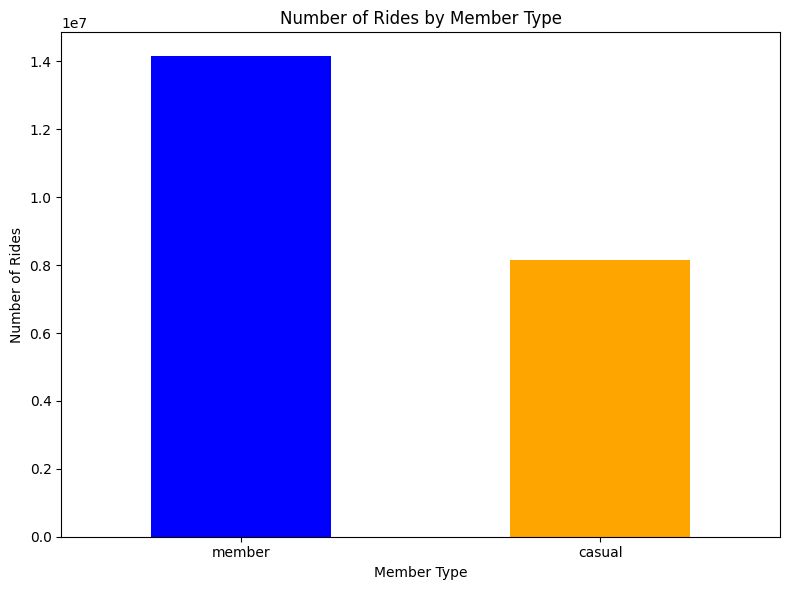

C:\Users\Brandon\AppData\Local\Temp\ipykernel_22088\2567562263.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  member_day_counts = merged_df.groupby(['day_of_week', 'member_casual']).size().unstack()


<Axes: xlabel='day_of_week'>

<Figure size 1000x600 with 0 Axes>

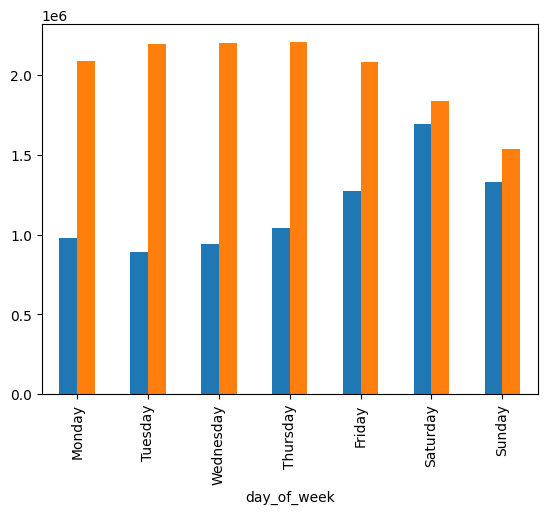

In [17]:
#Analysis Begins
#Count the number of rides by member type
member_counts = merged_df['member_casual'].value_counts()
print("\nNumber of rides by member type:")
print(member_counts)
# Plotting the number of rides by member type
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
member_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Rides by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Count the number of rides by day of week for member type
member_day_counts = merged_df.groupby(['day_of_week', 'member_casual']).size().unstack()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_day_counts = member_day_counts.reindex(order)
plt.figure(figsize=(10, 6))
member_day_counts.plot(kind='bar', stacked=False, legend=False)
